# Исследование объявлений о продаже квартир

### Шаг 1. Изучение общей информации. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице 22 столбца с разными типами данных: bool, float, int и object. Метод info() показал наличие пропущенных значений в достаточно большом количестве столбцов. Они могли возникнуть в следствие некорреткной выгрузки, либо некорректного заполнения данных - большая часть пропусков в части, полученной автоматически. Попробуем преобразовать данные и избавиться от пропусков, предложив логическую замену.

### Шаг 2. Предобработка данных

In [6]:
#Заполним пропуски в столбце с названиями населенных пунктов
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [7]:
#Заполним пропуски в жилой площади и площади кухни.

#если комнат 0, то это студия. Заменяем значения в столбце "studio":
data.loc[data['rooms'] == 0, 'studio'] = data.loc[data['rooms'] == 0, 'studio'].replace(False, True)
#если студия, то площадь кухни равна 0:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)
median_living_studio = data.groupby('studio')['living_area'].median()
data.loc[data['studio'] == True, 'living_area'] = data.loc[data['studio'] == True, 'living_area'].fillna(median_living_studio[True])
#для всех остальных типов квартир:
data_rooms_type = [1,2,3,4,5,6,7,8,9,10]#массив комнат
data_median_liv = data.groupby('rooms')['living_area'].median()#находим медиану для жилой площади
data_median_kit = data.groupby('rooms')['kitchen_area'].median()#находим медиану для кухни
#заменяем пропущенные значения на медианы:
room_type_num = 0 
for room in data_rooms_type:
    data.loc[data['rooms'] == room, 'living_area'] = data.loc[data['rooms'] == room, 'living_area'].fillna(data_median_liv[room_type_num])
    data.loc[data['rooms'] == room, 'kitchen_area'] = data.loc[data['rooms'] == room, 'kitchen_area'].fillna(data_median_kit[room_type_num])
    room_type_num +=1
#data.info()

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)#заполняем пропуске в столбце 'is_apartment'
data['balcony'] = data['balcony'].fillna(0)#заполняем пропуски в столбце 'balcony'
data['floors_total'] = data['floors_total'].fillna(0)#заполняем пропуски в столбце 'floors_total'

#меняем тип данных:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')


In [9]:
#data['last_price'].min() #уточняем минимальную цену жилья
#исправляем минимальную цену:
for row in data:  
    data.loc[data['last_price'] < 100000, 'last_price'] = data.loc[data['last_price'] < 100000, 'last_price']*1000
#исправляем некорректные значения в столбце с высотой потолка
for row in data:  
    data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >=20, 'ceiling_height']*0.1
def cel_hei(ceiling_height):
    if ceiling_height < 2.3:
        return None
    elif ceiling_height > 6:
        return None
    else:
        return ceiling_height
data['ceiling_height'] = data['ceiling_height'].apply(cel_hei)

data_city = data['locality_name'].unique()
data_median_height = data.groupby('locality_name')['ceiling_height'].median()#находим медиану потолка по городам
#заменяем пропуски в столбце с высотой потолка
height_type_num = 0 
for city in data_city:
    data.loc[data['locality_name'] == city, 'ceiling_height'] = data.loc[data['locality_name'] == city, 'ceiling_height'].fillna(data_median_height[height_type_num])
    height_type_num +=1
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)


### Вывод
Первым делом заполнили пропуски в столбце с наименованиями населенных пунктов. Посколько их всего 49, достаточно заполнить их специальным значением "Неизвестно" тем самым выделить в особую категорию и далее, при необходимости, работать с этой группой отдельно. Для некоторых квартир с количеством комнат равным 0, поменяли параметр в столбце "Студия" с False на True. Поскольку для квартир-студий характерно отсутсвие комнат. А также для таких типов квартир указали площадь кухни равной 0. Для всех остальных типов квартир пропуски в столбцах "Жилая площадь" и "Площадь кухни" заполнялись значениями медиан, отталкиваясь от количества комнат в квартире. Для квартир-студий пропуски в жилой площади заполняются аналогично медианой. Пропуски в столбце "Апартаменты" заполнили значением False. Поскольку, мы предположили, что апартаменты значительно менее популярный тип недвижимости, чем квартира, поэтому если отсутствует уточнение, значит это квартира. Тип данных этого же столбца изменили в соответствии с условием поставленной задачи. В столбце с данными о цене - поскольку недвижимость чаще продается без учета копеек. В столбце со значениями этажа - номер этажа это всегда целое число. Исправили некорректные значения в столбце "высота потолков". Преположили, что если высота более 20, то скорей всего сместилась ",", поэтому значение домножили на 0.1. Также избавились от значений ниже 2.3м и более 6м. Заменили их пропуском, а сами пропуски - на медианы в зависимости от населенного пункта.

### Шаг 3. Добавление данных в таблицу

In [10]:
data['price_per_meter']=data['last_price']/data['total_area']#цена за квадратный метр
data['price_per_meter'] = data['price_per_meter'].round(2)

#перевод строки в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

#добавление столбцов: день недели, месяц, год:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#заменяем числовое значение дня недели
week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
week_fl = 0
for day in week:
    data['weekday'] = data['weekday'].replace(week_fl,day)
    week_fl +=1

#категории этажей:
def floor_options(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другое'

data['floor_type'] = data.apply(floor_options, axis=1)
data['floor_type'] = data['floor_type'].astype('category')

#соотношение жилой и общей площади, а также отношение площади кухни к общей:
data['ratio_living_area']= data['living_area']/data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area']/data['total_area']
data['ratio_living_area'] = data['ratio_living_area'].round(2)
data['ratio_kitchen_area'] = data['ratio_kitchen_area'].round(2)


### Шаг 4. Исследовательский анализ данных

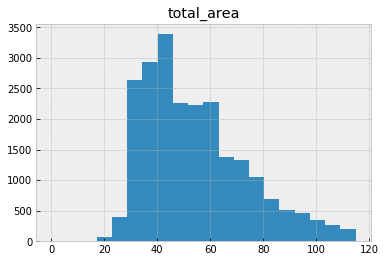

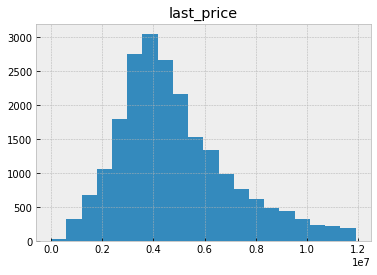

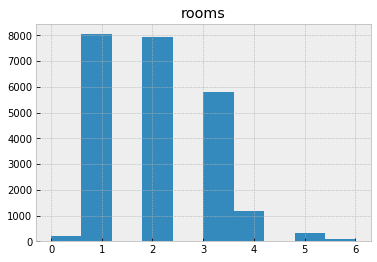

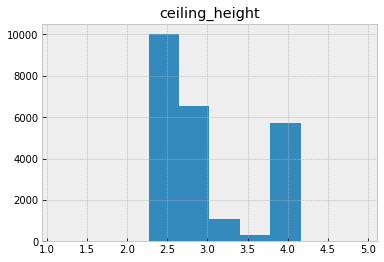

In [11]:
#изучение параметров: площадь, цена, число комнат, высота потолков
colums = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for row in colums:
    a = data[row].quantile(q=0.25) - ((data[row].quantile(q=0.75) - data[row].quantile(q=0.25)) * 1.5)
    b = data[row].quantile(q=0.75) + ((data[row].quantile(q=0.75) - data[row].quantile(q=0.25)) * 1.5)
    if a < 0:
        a = 0
    else:
        a = a
    if data[row].quantile(q=1)> 20:
        data.hist(row, bins = 20, range = (a, b))
    else:
        data.hist(row, range = (a, b))


### Вывод
Изучив гистограммы значений столбцов "Общая площадь", "Цена", "Количество комнат" и "Высота потолка" можно сказать, что распределиение больше похоже на Пуассона. Пик приходится на наиболее частые значения. Столбец "Цена" имеет большее количество значений, поэтому распределение Пуассона стремится к нормальному и более симметрично. Наиболее популярны: квартиры с площадью 30-40кв.м,  стоимость 3-5млн., квартиры от 1 до 2 комнат. На последней гистограмме ("Высота потолка") два пика, что может говорить о спросе квартир с высотой от 2,5 до 3м и 4м. Можно предположить, что это связано с популярностью разных типов помещений (новые, старые дома).

Среднее время продажи: 181
Медиана времени продажи: 95


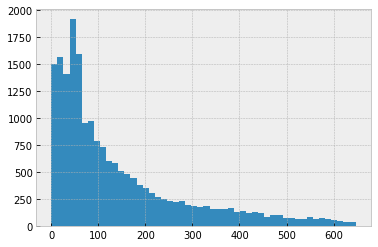

In [12]:
#Время продажи квартиры:
print('Среднее время продажи: {:.0f}'.format(data['days_exposition'].mean()))
print('Медиана времени продажи: {:.0f}'. format(data['days_exposition'].median()))
data['days_exposition'].hist(bins=50, range=(0,data['days_exposition'].quantile(q=0.95)));
plt.show()
# data.boxplot('days_exposition')
# plt.ylim(0, 600)
# plt.show()

По гистограмме видно, что распределение похоже на распределение Пуассона. Были посчитаны медианное и среднее значения времени продажи, они составили 95 и 181 соотвественно. Далее по диаграмме размаха можно сделать вывод о времени продажи:
1) Продажи, совершенные менее чем за 45 дней могут считаться быстрыми. 
2) Чаще всего продажа квартиры может длиться от 45 до 232 дней.
3) Медленной продажей могут считаться те, что совершились в период с 232-го по 512-й день.
4) Продажа квартиры более 512 дней может считаться необычно долгой. 

In [13]:
data.query('total_area < living_area + kitchen_area').count()

data['locality_name'] = data['locality_name'].replace('поселок Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово')

Часть редких и выбивающихся значения были убраны в пункте Предобработки данных. Общая площадь некоторых квартир оказалась больше суммы жилой и кухни. Но таких данных незначительное количество и можно ими пренебречь.
В столбце с нименованием населенного пункта были обнаружены некоторые особенности с определением типов населенных пунктов, например: указан "поселок" и "посёлок", "деревня Кудрово" и "Кудрово". Попытка лемматизировать весь столбец привела к искажению в названиях населенных пунктов, и от этой идеи пришлось отказаться. Для дальнейшего анализа были преобразованы лишь некоторые значения (входящие в топ-10 населённых пунктов с наибольшим числом объявлений). Стоит обратить внимание разработчиков на возможность разделения столбцов с типом и названием населенного пункта. Это позволит избежать некоторых ошибок в данных и упростит работу с ними. 

In [14]:
params = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']
new_data = data
#избавляемся от "вбросов"
for par in params:
    b = new_data[par].quantile(q=0.75) + ((new_data[par].quantile(q=0.75) - new_data[par].quantile(q=0.25)) * 1.5)
    new_data = new_data.loc[new_data[par]<b]
table_stat = new_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
print(table_stat.corr())#матрица корреляции для параметров "Цена", "Общая площадь", "Количество комнат", "Расстояние до центра"
print()
#зависимость от "Этажа"
dep_price_for_floot=data.pivot_table(index='floor_type', values=['price_per_meter','last_price'] , aggfunc='median')
print(dep_price_for_floot.sort_values(by ='last_price', ascending=False))
print()
print()
table_stat = new_data[['last_price', 'month', 'year']]
print(table_stat.corr())#матрица корреляции для параметров "Цена", "Месяц публикации","Год публикации"
print()
dep_price_for_week=data.pivot_table(index='weekday', values=['price_per_meter','last_price'] , aggfunc='median')
print(dep_price_for_week.sort_values(by ='last_price', ascending=False))#зависимость "Цены" от "День недели"

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.779728  0.489756            -0.360553
total_area             0.779728    1.000000  0.789824            -0.170263
rooms                  0.489756    0.789824  1.000000            -0.139277
cityCenters_nearest   -0.360553   -0.170263 -0.139277             1.000000

            last_price  price_per_meter
floor_type                             
Другое         4850000         98295.30
Последний      4300000         87782.02
Первый         3900000         81223.63


            last_price     month      year
last_price    1.000000 -0.004431  0.036195
month        -0.004431  1.000000 -0.272561
year          0.036195 -0.272561  1.000000

             last_price  price_per_meter
weekday                                 
Вторник         4730000         95634.10
Среда           4700000         95478.27
Понедельник     4650000         94688.91
Четверг         4650000         95143.88
Пят

Изучив коэффициенты матрицы корреляции можно сказать, что стоимость квартиры имеет наибольшую взаимосвязь с площадью помещения, чуть меньшую - с количеством комнат, а также с удаленностью от центра (обратная связь). По таблице зависимости цены от этажа можно сказать, что стоимость первого и последних этажей ниже, чем остальных. Также видно, что стоимость квартиры не зависит от месяца и года публикаций. Интересный факт, в объявлениях, которые опубликованы в будние дни, в среднем цена квартиры выше, чем в выходные (возможно это связано с наценкой агентств недвижимости у которых 5-ти дневняя рабочая неделя)

In [15]:
#10 населённых пунктов с наибольшим числом объявлений. 
top_local = data['locality_name'].value_counts().head(10)
top_slice = data.query('locality_name in @top_local.index')
table_price_top = top_slice.pivot_table(index='locality_name', values='price_per_meter', aggfunc = 'median')
table_price_top.sort_values(by='price_per_meter', ascending=False).round(2)

,price_per_meter
locality_name,
Санкт-Петербург,104770.27
Пушкин,100000.00
деревня Кудрово,95675.48
посёлок Парголово,91642.86
посёлок Мурино,85878.46
посёлок Шушары,76876.18
Колпино,74723.74
Гатчина,67796.61
Всеволожск,65789.47


In [16]:
#Населённые пункты с самой высокой и низкой стоимостью жилья. 
print(top_slice.loc[top_slice['last_price'] == top_slice['last_price'].max(), ('last_price', 'locality_name')])
print()
print(top_slice.loc[top_slice['last_price'] == top_slice['last_price'].min(), ('last_price', 'locality_name')])

       last_price    locality_name
12971   763000000  Санкт-Петербург

       last_price locality_name
12536      600000        Выборг


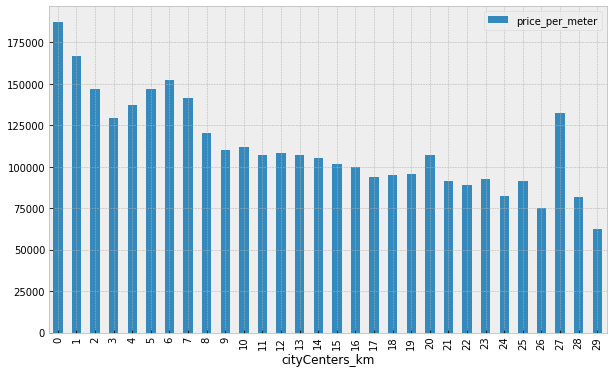

In [17]:
data['cityCenters_km']=data['cityCenters_nearest']/1000 #переводим метры в километры
saint_petersburg = data.query('locality_name == "Санкт-Петербург"').copy()#зона Санкт-Петербурга
saint_petersburg.dropna(subset = ['cityCenters_nearest'], inplace = True)
saint_petersburg['cityCenters_km']=saint_petersburg['cityCenters_km'].astype('int')

(saint_petersburg
         .pivot_table(index='cityCenters_km', values='price_per_meter')
         .plot(kind='bar', grid=True, figsize=(10, 6))
);

Выделив сегмент квартир в Санкт-Петербурге можем предположительно определить область центра: по графику - резкое снижение стоимости кв.метра жилья на протяжении первых 4 км.

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.680923  0.425604            -0.129057
total_area             0.680923    1.000000  0.774985            -0.040229
rooms                  0.425604    0.774985  1.000000            -0.037291
cityCenters_nearest   -0.129057   -0.040229 -0.037291             1.000000

            last_price  price_per_meter
floor_type                             
Другое        10000000        119148.94
Последний      9400000        114432.50
Первый         7125000        107508.77


            last_price     month      year
last_price    1.000000 -0.059124 -0.019646
month        -0.059124  1.000000 -0.222151
year         -0.019646 -0.222151  1.000000

             last_price  price_per_meter
weekday                                 
Четверг         5650000       105823.640
Вторник         5500000       104602.510
Понедельник     5500000       104887.010
Пятница         5500000       104303.990
Сре

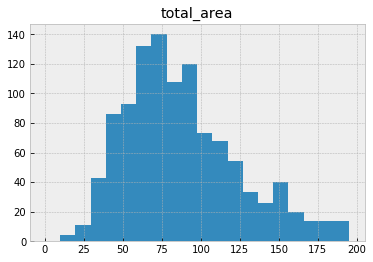

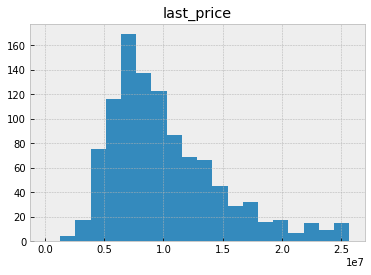

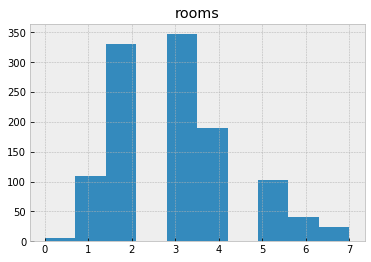

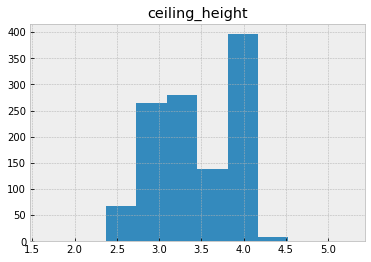

In [18]:
data_st_pet4 = saint_petersburg.query('cityCenters_km <4').copy()
colums_4km = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for row_4 in colums_4km:
    a_4 = data_st_pet4[row_4].quantile(q=0.25) - ((data_st_pet4[row_4].quantile(q=0.75) - data_st_pet4[row_4].quantile(q=0.25)) * 1.5)
    b_4 = data_st_pet4[row_4].quantile(q=0.75) + ((data_st_pet4[row_4].quantile(q=0.75) - data_st_pet4[row_4].quantile(q=0.25)) * 1.5)
    if a_4 < 0:
        a_4 = 0
    else:
        a_4 = a_4
    if data_st_pet4[row_4].quantile(q=1)> 20:
        data_st_pet4.hist(row_4, bins = 20, range = (a_4, b_4))
    else:
        data_st_pet4.hist(row_4, range = (a_4, b_4))
params_4km = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']
new_data_4km = data_st_pet4
for par_4km in params_4km:
    b2 = new_data_4km[par_4km].quantile(q=0.75) + ((new_data_4km[par_4km].quantile(q=0.75) - new_data_4km[par_4km].quantile(q=0.25)) * 1.5)
    new_data_4km = new_data_4km.loc[new_data_4km[par_4km]<b2]
table_stat_4km = new_data_4km[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
print(table_stat_4km.corr())

print()
dep_price_for_floot_4km=data_st_pet4.pivot_table(index='floor_type', values=['price_per_meter','last_price'] , aggfunc='median')
print(dep_price_for_floot_4km.sort_values(by ='last_price', ascending=False))
print()
print()
table_stat_4km_per = new_data_4km[['last_price', 'month', 'year']]
print(table_stat_4km_per.corr())
print()
dep_price_for_week_4km=saint_petersburg.pivot_table(index='weekday', values=['price_per_meter','last_price'] , aggfunc='median')
print(dep_price_for_week_4km.sort_values(by ='last_price', ascending=False))

Выделив сегмент квартир в центре и изучив такие параметры как: площадь, цена, число комнат, высота потолков, можно сделать вывод: в центре преобладают квартиры площадью от 60кв.м до 70 кв.м, количество комнат - 2-3 и высота потолков 4м. Стоимость квартиры имеет большую взаимосвязь с площадью помещения и меньшую - с количеством комнат, влияние расстояния до центра стало еще менее значительным, можно даже сказать что расстояние уже не влияет.. По таблице зависимости цены от этажа - нименьшая средняя стоимость у квартир на первых этажах. Также стоимость квартир не зависит от даты публикации. 

In [19]:

params1 = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']
new_data1 = saint_petersburg
for par1 in params1:
    b1 = new_data1[par1].quantile(q=0.75) + ((new_data1[par1].quantile(q=0.75) - new_data1[par1].quantile(q=0.25)) * 1.5)
    new_data1 = new_data1.loc[new_data1[par1]<b1]
table_stat1 = new_data1[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
dep_price_for_floot1=saint_petersburg.pivot_table(index='floor_type', values=['price_per_meter','last_price'] , aggfunc='median')
table_stat11 = new_data1[['last_price', 'month', 'year']]





In [20]:
#зависимость для Санкт-Петербурга (число комнат, этаж, удалённость от центра, дата размещения объявления)
print(table_stat1.corr())
print()
print(dep_price_for_floot1.sort_values(by ='last_price', ascending=False))
print()
print(table_stat11.corr())

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.799608  0.491336            -0.362135
total_area             0.799608    1.000000  0.784911            -0.216983
rooms                  0.491336    0.784911  1.000000            -0.150814
cityCenters_nearest   -0.362135   -0.216983 -0.150814             1.000000

            last_price  price_per_meter
floor_type                             
Последний      5650000       102036.690
Другое         5600000       106666.670
Первый         4850000        93308.455

            last_price     month      year
last_price    1.000000 -0.003840  0.014144
month        -0.003840  1.000000 -0.277348
year          0.014144 -0.277348  1.000000


### Шаг 5. Общий вывод

Мы провели исследовательский анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов. Предобработали данные: определили и изучили пропущенные значения, там где это возможно нашли логичную замену, указали возможные причины, которые могли привести к пропускам в данных. Изучили параметры: площадь, цена, число комнат, высота потолков, как для всей области, так и отдельно для центра и для города. Построили гистограммы для каждого параметра. Изучили время продажи квартиры. Предположили, что продажи, совершенные менее чем за 45 дней считаются быстрыми, а продажи квартиры более 512 дней - считаются необычно долгими. Изучили факторы которые больше всего влияют на стоимость квартиры. Можно сказать, что на стоимость больше всего влияет площадь помещения (квадратные метры), при этом число комнат имеет меньшее влияние. Также, на стоимость влияет расположение квартиры: этаж - на первом этаже квартиры дешевле, расстояние до центра -  чем ближе к центру, тем сильнее повышается цена, но есть несколько исключений, возможно это связано с районами с элитными ЖК или более комфортными условиями. А вот дата размещения на стоимость никак не влияют. Выделили для топ-10 населенных пунктов с наибольшим количеством объявлений, два населенных пункта с наименьшей и наибольшей стоимостью жилья - ими оказались Санкт-Петербург и Выборг соответственно.